# Esercizio 11

Nel sequente esercizio si vuole testare il fit di tre funzioni con rumore, da $\mathbb{R} \to \mathbb{R}$ e da $\mathbb{R}^2 \to \mathbb{R}$ applicando il machine learning. Verranno in seguito mostrati e commentati i risultati ottenuti variando le caratteristiche tipiche della struttura e delle funzioni di apprendimento di una rete neurale. Per effettuare i fit verranno generate delle coppie $(\vec{x},y)$ attraverso $y_i= f(\vec{x_i}) + \eta_i$, dove $\eta_i$ è un rumore di tipo gaussiano. I valori generati verranno suddivisi rispettivamente, secondo una proporzione di circa $90\%$ e $10\%$ in valori $train$ e valori $validation$, attraverso i quali addestrare e testare il modello generato.

I risultati saranno mostrati attraverso due grafici. Il primo grafico confronta la curva di apprendimento del set di dati utilizzati come $train$ con la curva ottenuta attraverso i dati $validation$. La prima dà un'idea di quanto bene sta apprendendo il modello in funzione del numero di epoche, mentre la seconda mostra il livello di generalizzazione del modello, valutandone l'errore su un set di dati non utilizzato per la costruizione dello stesso. Il secondo grafico invece, dà un'idea qualitativa della bontà del modello nell'intervallo in esame. Per fare ciò viene generato un nuovo set di valori di input e vengono graficati contemporaneamente i valori di output predetti dal modello e quelli ottenuti dalla funzione analitica. 

In [197]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True' #Serve a risolvere errore "Dead Kernel"

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


# Lineare
Come primo punto, ci proponiamo di analizzare il fit di una funzione lineare : $$
f(x)=2x+1
$$
Per ogni singolo neurone sono presenti due parametri, $w$ ovvero $weight$ e $b$ ovvero il $bias$, e l'output sarà di fatto una  $f(z)$, con $z=wx+b$. Perciò per effettuare un fit lineare, è sufficiente un solo neurone. In tal modo è possibile analizzare il comportamento dell'algoritmo di apprendimento in funzione dei parametri $N_{train}$, $Epoch$ e la larghezza del rumore gaussiano $\sigma$, rimandando ad un'analisi successiva parametri di stuttura come numero di neuroni e numero di layer. 

Sono state analizzate le variazioni di un parametro alla volta, lasciando i rimanenti in condizioni ragionevoli: 
$N_{train}=500$, $epoch=30$, $\sigma=0.5$ e utilizzando "Stochastic gradient descent" come ottimizzatore e "Mean square error" sia come perdita che come metrica.

## $N_{Train}$
$N_{train}$ rappresenta il numero di punti attraverso il quale la NN apprende e costruisce il modello. Sono qui messi a confronto i risultati ottenuti attraverso $N_{train_1}=500$ e $N_{train_2}=100$. Per i dati di validation è stato utilizzato lo stesso set. 

Come si può notare, nel caso di troppi pochi dati di training il risultato è un underfit, determinato da un errore maggiore e con derivata della curva di apprendimento negativa nel punto finale. 

In [198]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
x_train2 = x_train[:100]
x_valid2 = x_valid
y_target = m * x_valid + b 
y_target2 = m * x_valid2 + b 

model = tf.keras.Sequential()
model2 = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model2.add(Dense(1, input_shape=(1,)))

sigma = 0.5 #noise = 0.5
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)
y_train2 = y_train [:100]
y_valid2 = y_valid 

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))
model.get_weights()

model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.summary()
history2 = model2.fit(x=x_train2, y=y_train2, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid2, y_valid2))
model2.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score2 = model2.evaluate(x_valid2, y_valid2, batch_size=32, verbose=1)



Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_493 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Train on 500 samples, validate on 50 samples
Epoch 1/30
500/500 [==============================] - 3s 5ms/sample - loss: 5.0566 - mean_squared_error: 5.0566 - val_loss: 4.1676 - val_mean_squared_error: 4.1676
Epoch 2/30
500/500 [==============================] - 0s 143us/sample - loss: 3.9331 - mean_squared_error: 3.9331 - val_loss: 3.2830 - val_mean_squared_error: 3.2830
Epoch 3/30
500/500 [==============================] - 0s 141us/sample - loss: 3.1213 - mean_squared_error: 3.1213 - val_loss: 2.6184 - val_mean_squared_error: 2.6184
Epoch 4/30
500/500 [==============================] - 0s 143us/sample - loss: 2.5058 - mean_squared_error: 2.50

Epoch 14/30
100/100 [==============================] - 0s 278us/sample - loss: 0.8988 - mean_squared_error: 0.8988 - val_loss: 0.9834 - val_mean_squared_error: 0.9834
Epoch 15/30
100/100 [==============================] - 0s 280us/sample - loss: 0.8650 - mean_squared_error: 0.8650 - val_loss: 0.9342 - val_mean_squared_error: 0.9342
Epoch 16/30
100/100 [==============================] - 0s 273us/sample - loss: 0.8256 - mean_squared_error: 0.8256 - val_loss: 0.8794 - val_mean_squared_error: 0.8794
Epoch 17/30
100/100 [==============================] - 0s 276us/sample - loss: 0.7825 - mean_squared_error: 0.7825 - val_loss: 0.8477 - val_mean_squared_error: 0.8477
Epoch 18/30
100/100 [==============================] - 0s 272us/sample - loss: 0.7567 - mean_squared_error: 0.7567 - val_loss: 0.8138 - val_mean_squared_error: 0.8138
Epoch 19/30
100/100 [==============================] - 0s 260us/sample - loss: 0.7306 - mean_squared_error: 0.7306 - val_loss: 0.7772 - val_mean_squared_error: 0.777

Ntrain=500
Test loss: 0.28127843379974365
Test accuracy: 0.28127843
Ntrain=200
Test loss: 0.5329874897003174
Test accuracy: 0.5329875


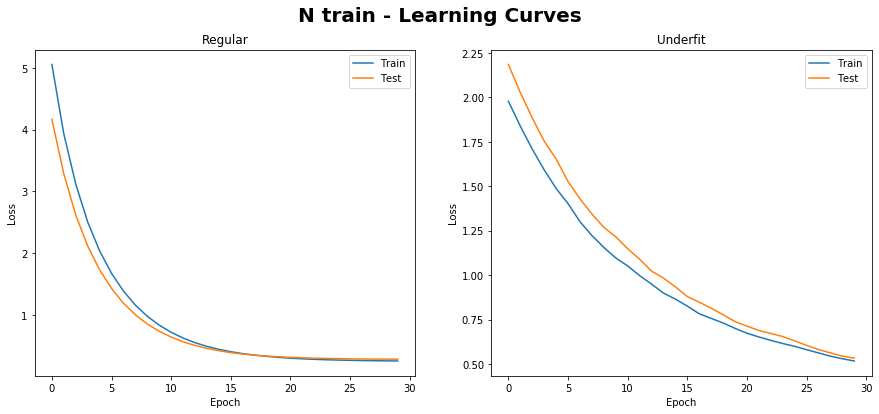

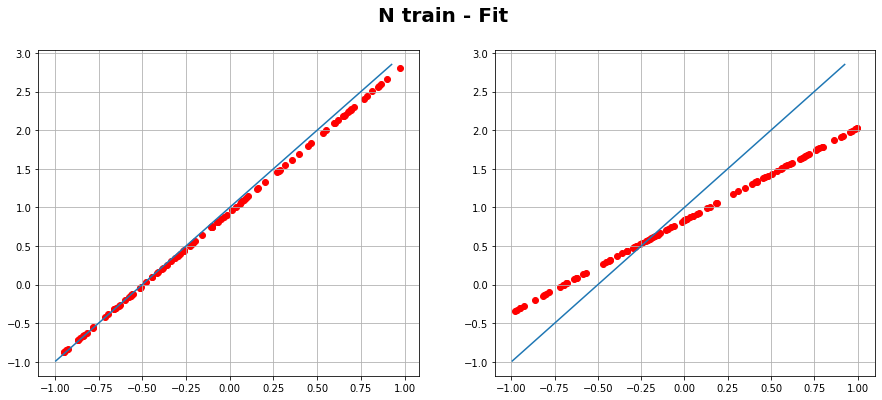

In [199]:
# print performance
print("Ntrain=500")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Ntrain=200")
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])


fig=plt.figure(figsize=(15,6))
fig.suptitle('N train - Learning Curves', fontsize=20, fontweight="bold")

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Regular')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(122)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Underfit')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.show()

fig=plt.figure(figsize=(15,6))
fig.suptitle('N train - Fit', fontsize=20, fontweight="bold")

plt.subplot(121)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)

plt.subplot(122)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

## Epoche 
 In questo caso invece viene studiata la variazione del numero di epoche, rendendo la situazione di underfit simile a quella precedentemente descritta.

In [200]:
#Epoches 
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
x_train2 = x_train
x_valid2 = x_valid
y_target = m * x_valid + b 
y_target2 = m * x_valid2 + b 

model = tf.keras.Sequential()
model2 = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model2.add(Dense(1, input_shape=(1,)))

sigma1 = 0.5 #noise
sigma2 = 0.5
y_train = np.random.normal(m * x_train + b, sigma1) 
y_valid = np.random.normal(m * x_valid + b, sigma2)
y_train2 = y_train
y_valid2 = y_valid 

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))
model.get_weights()

model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.summary()
history2 = model2.fit(x=x_train2, y=y_train2, 
          batch_size=32, epochs=5,
          shuffle=True, 
          validation_data=(x_valid2, y_valid2))
model2.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score2 = model2.evaluate(x_valid2, y_valid2, batch_size=32, verbose=1)


Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_495 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Train on 500 samples, validate on 50 samples
Epoch 1/30
500/500 [==============================] - 3s 5ms/sample - loss: 3.3498 - mean_squared_error: 3.3498 - val_loss: 2.8280 - val_mean_squared_error: 2.8280
Epoch 2/30
500/500 [==============================] - 0s 138us/sample - loss: 2.5594 - mean_squared_error: 2.5594 - val_loss: 2.1988 - val_mean_squared_error: 2.1988
Epoch 3/30
500/500 [==============================] - 0s 145us/sample - loss: 2.0149 - mean_squared_error: 2.0149 - val_loss: 1.7445 - val_mean_squared_error: 1.7445
Epoch 4/30
500/500 [==============================] - 0s 152us/sample - loss: 1.6167 - mean_squared_error: 1.61

N Epoche = 30
Test loss: 0.27999909400939943
Test accuracy: 0.27999908
N Epoche = 5
Test loss: 1.1832063293457031
Test accuracy: 1.1832063


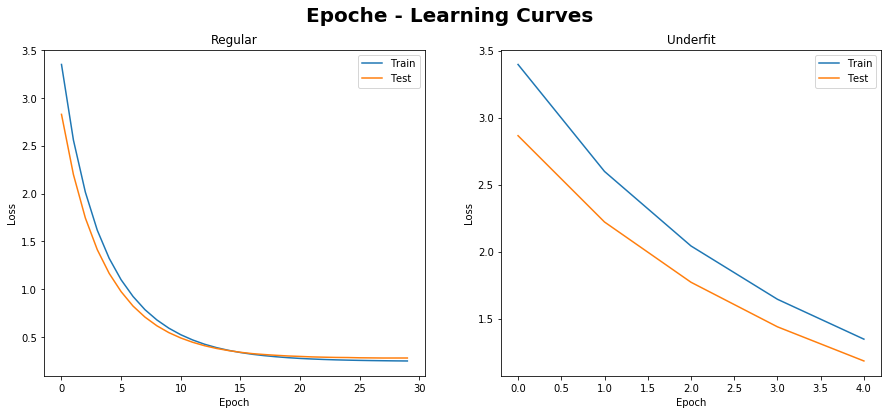

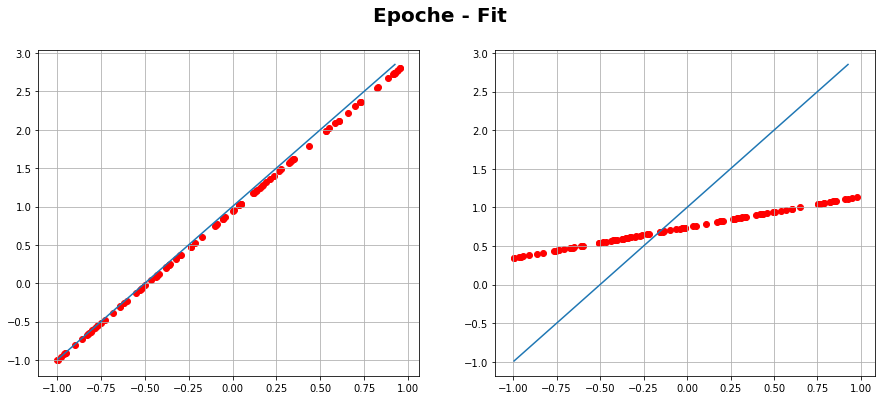

In [201]:
# print performance
print("N Epoche = 30")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("N Epoche = 5")
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])


fig=plt.figure(figsize=(15,6))
fig.suptitle('Epoche - Learning Curves', fontsize=20, fontweight="bold")


plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Regular')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(122)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Underfit')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.show()

fig=plt.figure(figsize=(15,6))
fig.suptitle('Epoche - Fit ', fontsize=20, fontweight="bold")

plt.subplot(121)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)

plt.subplot(122)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

## Sigma e batch
Infine è stata testata l'influenza di un rumore elevato. Il valore di $\sigma$ è stato settato a $3.0$, mentre sono stati utilizzate dimensioni del batch differenti (nel primo caso $32$ e nel secondo $5$). In assenza di rumore, la riduzione del batch permette di apprendere più rapidamente e ottenere un modello più preciso. In questo caso però, il fatto che il modello venga aggiornato dopo solo 5 iterazioni, fa si che il fit del modello sia maggiormente influenzato dall'andamento del rumore, cercando di seguire quest'ultimo invece che l'andamento della curva nella sua generalità.

In [202]:
##Ntrain
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
x_train2 = x_train
x_valid2 = x_valid
y_target = m * x_valid + b 
y_target2 = m * x_valid2 + b 

model = tf.keras.Sequential()
model2 = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model2.add(Dense(1, input_shape=(1,)))

sigma = 3.0 #noise
y_train = np.random.normal(m * x_train + b, sigma) 
y_valid = np.random.normal(m * x_valid + b, sigma)
y_train2 = y_train
y_valid2 = y_valid 

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))
model.get_weights()

model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.summary()
history2 = model2.fit(x=x_train2, y=y_train2, 
          batch_size=5, epochs=30,
          shuffle=True, 
          validation_data=(x_valid2, y_valid2))
model2.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=100, verbose=1)
score2 = model2.evaluate(x_valid2, y_valid2, batch_size=10, verbose=1)

Model: "sequential_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_497 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 100 samples
Epoch 1/30
1000/1000 [==============================] - 3s 3ms/sample - loss: 11.6660 - mean_squared_error: 11.6660 - val_loss: 11.1121 - val_mean_squared_error: 11.1121
Epoch 2/30
1000/1000 [==============================] - 0s 149us/sample - loss: 10.3371 - mean_squared_error: 10.3371 - val_loss: 9.9222 - val_mean_squared_error: 9.9222
Epoch 3/30
1000/1000 [==============================] - 0s 171us/sample - loss: 9.6628 - mean_squared_error: 9.6628 - val_loss: 9.1776 - val_mean_squared_error: 9.1776
Epoch 4/30
1000/1000 [==============================] - 0s 139us/sample - loss: 9.2591 - mean_squ

1000/1000 [==============================] - 1s 740us/sample - loss: 8.5648 - mean_squared_error: 8.5648 - val_loss: 7.4123 - val_mean_squared_error: 7.4123
Epoch 14/30
1000/1000 [==============================] - 1s 741us/sample - loss: 8.5535 - mean_squared_error: 8.5535 - val_loss: 7.4475 - val_mean_squared_error: 7.4475
Epoch 15/30
1000/1000 [==============================] - 1s 744us/sample - loss: 8.5588 - mean_squared_error: 8.5588 - val_loss: 7.3974 - val_mean_squared_error: 7.3974
Epoch 16/30
1000/1000 [==============================] - 1s 738us/sample - loss: 8.5570 - mean_squared_error: 8.5570 - val_loss: 7.4116 - val_mean_squared_error: 7.4116
Epoch 17/30
1000/1000 [==============================] - 1s 738us/sample - loss: 8.5681 - mean_squared_error: 8.5681 - val_loss: 7.3992 - val_mean_squared_error: 7.3992
Epoch 18/30
1000/1000 [==============================] - 1s 743us/sample - loss: 8.5566 - mean_squared_error: 8.5566 - val_loss: 7.4698 - val_mean_squared_error: 7.469

N batch = 32
Test loss: 7.3933820724487305
Test accuracy: 7.393382
N batch = 5
Test loss: 7.404072570800781
Test accuracy: 7.4040723


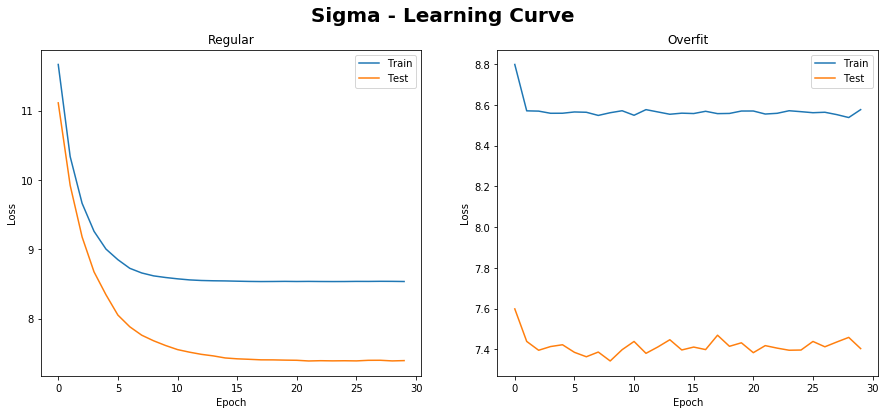

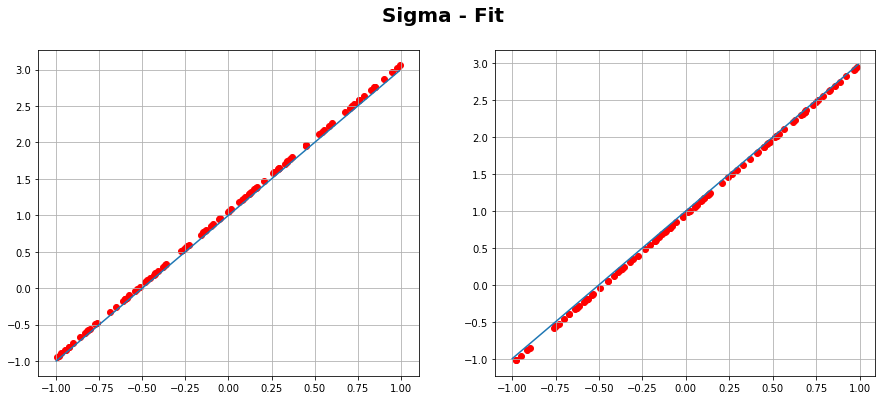

In [203]:
# print performance
print("N batch = 32")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("N batch = 5")
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])


fig=plt.figure(figsize=(15,6))
fig.suptitle('Sigma - Learning Curve ', fontsize=20, fontweight="bold")


plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Regular')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(122)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Overfit')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.show()

fig=plt.figure(figsize=(15,6))
fig.suptitle('Sigma - Fit', fontsize=20, fontweight="bold")

plt.subplot(121)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)

plt.subplot(122)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

# Polinomiale

La seconda funzione presa in considerazione è: $$
f(x)=4-3x-2x^2+3x^3
$$ per $x$ appartenente a  $[-1,1]$. 

## Struttura 
Nella seguente sezione si vuole testare l'abilità di apprendimento di una rete neurale rispetto a strutture differenti. Il punto di partenza dell'analisi effettuata sono i due teoremi di approssimazione universale. Il primo asserisce che si possa ottenere un'approssimazione con accuratezza arbitraria del polinomio in esame con un solo hidden layer, purchè sia permessa la crescita in ampiezza. Il secondo invece ci assicura lo stesso risultato con una struttura di ampiezza $n+4$, dove n è la dimensione dell'input, potendo crescere in profondità, e quindi aumentando il numero di hidden layers.

- Test 1: nel primo test si è studiata la dimensione minima della rete per ottenere una buona approssimazione, $[5, 3, 1]$.
- Test 2: nel secondo test si è voluto testare il primo teorema, aumentando l'ampiezza della rete ma lasciando solo un hidden layer $[100, 50, 1]$.
- Test 3: il terzo test invece ha voluto testare il secondo teorema, lasciando l'ampiezza massima della rete pari a $5=n+4$ e aumentando il numero di hidden layer $[5, 3, 2, 1]$.
- Test 4, 5, 6: infine sono state testate reti particolarmente complesse che sfruttano ampiezza e profondità. Nei tre test si è voluto anche osservare le differenze fra una rete piramidale descrescente e una ad ampiezze variabili $[100, 50, 100, 50, 1]$, $[100, 100, 50, 50, 1]$, $[200, 100, 50, 25, 1]$.
 

In [204]:
# target parameters of f(x) = a*x^3 + b*x^2 + c*x + d
a=3
b=-2
c=-3
d=4

def eval(a, b, c, d, x):
  return a*x*x*x + b*x*x + c*x + d


In [205]:
# target parameters of f(x) = m*x + b
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True' #Serve a risolvere errore "Dead Kernel"

In [206]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2000)
x_valid = np.random.uniform(-1, 1, 200)
x_valid.sort()
y_target = eval(a, b, c, d, x_valid) 

model5 = tf.keras.Sequential()
model6 = tf.keras.Sequential()
model7 = tf.keras.Sequential()
model8 = tf.keras.Sequential()
model9 = tf.keras.Sequential()
model10 = tf.keras.Sequential()

sigma = 0.5 #noise
y_train = np.random.normal(eval(a, b, c, d, x_train) , sigma) 
y_valid = np.random.normal(eval(a, b, c, d, x_valid) , sigma)

# compile the model choosing optimizer, loss and metrics objects


In [207]:
model5.add(Dense(5, input_shape=(1,), activation='relu'))
model5.add(Dense(3, activation = 'relu'))
model5.add(Dense(1,))

model5.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history5 = model5.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 3s 1ms/sample - loss: 2.1376 - mean_absolute_error: 1.0907 - val_loss: 0.8330 - val_mean_absolute_error: 0.7168
Epoch 2/30
2000/2000 [==============================] - 0s 150us/sample - loss: 0.7629 - mean_absolute_error: 0.6849 - val_loss: 0.7414 - val_mean_absolute_error: 0.6733
Epoch 3/30
2000/2000 [==============================] - 0s 141us/sample - loss: 0.6873 - mean_absolute_error: 0.6472 - val_loss: 0.6700 - val_mean_absolute_error: 0.6370
Epoch 4/30
2000/2000 [==============================] - 0s 141us/sample - loss: 0.6156 - mean_absolute_error: 0.6088 - val_loss: 0.6024 - val_mean_absolute_error: 0.6111
Epoch 5/30
2000/2000 [==============================] - 0s 139us/sample - loss: 0.5477 - mean_absolute_error: 0.5773 - val_loss: 0.5354 - val_mean_absolute_error: 0.5801
Epoch 6/30
2000/2000 [==============================] - 0s 140us/sample - loss: 0.4845 - mean_absolute_er

In [208]:
model6.add(Dense(100, input_shape=(1,), activation='relu'))
model6.add(Dense(50, activation = 'relu'))
model6.add(Dense(1,))

model6.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history6 = model6.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 3s 1ms/sample - loss: 2.8273 - mean_absolute_error: 1.2742 - val_loss: 0.7659 - val_mean_absolute_error: 0.6995
Epoch 2/30
2000/2000 [==============================] - 0s 154us/sample - loss: 0.6734 - mean_absolute_error: 0.6437 - val_loss: 0.6420 - val_mean_absolute_error: 0.6305
Epoch 3/30
2000/2000 [==============================] - 0s 151us/sample - loss: 0.5712 - mean_absolute_error: 0.5868 - val_loss: 0.5514 - val_mean_absolute_error: 0.5775
Epoch 4/30
2000/2000 [==============================] - 0s 156us/sample - loss: 0.5022 - mean_absolute_error: 0.5495 - val_loss: 0.4889 - val_mean_absolute_error: 0.5473
Epoch 5/30
2000/2000 [==============================] - 0s 153us/sample - loss: 0.4476 - mean_absolute_error: 0.5222 - val_loss: 0.4398 - val_mean_absolute_error: 0.5233
Epoch 6/30
2000/2000 [==============================] - 0s 175us/sample - loss: 0.4049 - mean_absolute_er

In [209]:
model7.add(Dense(5, input_shape=(1,), activation='relu'))
model7.add(Dense(3, activation = 'relu'))
model7.add(Dense(2, activation = 'relu'))
model7.add(Dense(1,))

model7.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history7 = model7.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 2.2325 - mean_absolute_error: 1.1212 - val_loss: 0.7678 - val_mean_absolute_error: 0.7029
Epoch 2/30
2000/2000 [==============================] - 0s 147us/sample - loss: 0.6933 - mean_absolute_error: 0.6593 - val_loss: 0.6647 - val_mean_absolute_error: 0.6357
Epoch 3/30
2000/2000 [==============================] - 0s 151us/sample - loss: 0.5998 - mean_absolute_error: 0.6033 - val_loss: 0.5723 - val_mean_absolute_error: 0.5933
Epoch 4/30
2000/2000 [==============================] - 0s 155us/sample - loss: 0.5071 - mean_absolute_error: 0.5541 - val_loss: 0.4798 - val_mean_absolute_error: 0.5408
Epoch 5/30
2000/2000 [==============================] - 0s 142us/sample - loss: 0.4330 - mean_absolute_error: 0.5126 - val_loss: 0.4120 - val_mean_absolute_error: 0.5067
Epoch 6/30
2000/2000 [==============================] - 0s 146us/sample - loss: 0.3711 - mean_absolute_er

In [210]:
model8.add(Dense(100, input_shape=(1,), activation='relu'))
model8.add(Dense(50, activation = 'relu'))
model8.add(Dense(100, activation = 'relu'))
model8.add(Dense(50, activation = 'relu'))
model8.add(Dense(1,))

model8.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history8 = model8.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))


Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 2.6419 - mean_absolute_error: 1.2528 - val_loss: 0.7149 - val_mean_absolute_error: 0.6805
Epoch 2/30
2000/2000 [==============================] - 0s 171us/sample - loss: 0.5644 - mean_absolute_error: 0.5906 - val_loss: 0.5032 - val_mean_absolute_error: 0.5496
Epoch 3/30
2000/2000 [==============================] - 0s 169us/sample - loss: 0.4337 - mean_absolute_error: 0.5095 - val_loss: 0.4126 - val_mean_absolute_error: 0.5099
Epoch 4/30
2000/2000 [==============================] - 0s 171us/sample - loss: 0.3635 - mean_absolute_error: 0.4723 - val_loss: 0.3467 - val_mean_absolute_error: 0.4728
Epoch 5/30
2000/2000 [==============================] - 0s 170us/sample - loss: 0.3175 - mean_absolute_error: 0.4437 - val_loss: 0.3131 - val_mean_absolute_error: 0.4495
Epoch 6/30
2000/2000 [==============================] - 0s 171us/sample - loss: 0.2934 - mean_absolute_er

In [211]:
model9.add(Dense(100, input_shape=(1,), activation='relu'))
model9.add(Dense(100, activation = 'relu'))
model9.add(Dense(50, activation = 'relu'))
model9.add(Dense(50, activation = 'relu'))
model9.add(Dense(1,))

model9.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history9 = model9.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))


Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 2.3198 - mean_absolute_error: 1.1258 - val_loss: 0.6819 - val_mean_absolute_error: 0.6303
Epoch 2/30
2000/2000 [==============================] - 0s 171us/sample - loss: 0.5641 - mean_absolute_error: 0.5787 - val_loss: 0.5531 - val_mean_absolute_error: 0.5605
Epoch 3/30
2000/2000 [==============================] - 0s 170us/sample - loss: 0.4534 - mean_absolute_error: 0.5203 - val_loss: 0.4476 - val_mean_absolute_error: 0.5157
Epoch 4/30
2000/2000 [==============================] - 0s 171us/sample - loss: 0.3805 - mean_absolute_error: 0.4797 - val_loss: 0.3666 - val_mean_absolute_error: 0.4834
Epoch 5/30
2000/2000 [==============================] - 0s 170us/sample - loss: 0.3290 - mean_absolute_error: 0.4508 - val_loss: 0.3247 - val_mean_absolute_error: 0.4567
Epoch 6/30
2000/2000 [==============================] - 0s 170us/sample - loss: 0.3014 - mean_absolute_er

In [212]:
model10.add(Dense(200, input_shape=(1,), activation='relu'))
model10.add(Dense(100, activation = 'relu'))
model10.add(Dense(50, activation = 'relu'))
model10.add(Dense(25, activation = 'relu'))
model10.add(Dense(1,))

model10.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history10 = model10.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))


Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 1.7178 - mean_absolute_error: 0.9528 - val_loss: 0.6111 - val_mean_absolute_error: 0.6031
Epoch 2/30
2000/2000 [==============================] - 0s 176us/sample - loss: 0.5153 - mean_absolute_error: 0.5526 - val_loss: 0.4693 - val_mean_absolute_error: 0.5364
Epoch 3/30
2000/2000 [==============================] - 0s 176us/sample - loss: 0.4075 - mean_absolute_error: 0.4949 - val_loss: 0.3825 - val_mean_absolute_error: 0.4898
Epoch 4/30
2000/2000 [==============================] - 0s 175us/sample - loss: 0.3431 - mean_absolute_error: 0.4598 - val_loss: 0.3392 - val_mean_absolute_error: 0.4683
Epoch 5/30
2000/2000 [==============================] - 0s 175us/sample - loss: 0.3111 - mean_absolute_error: 0.4404 - val_loss: 0.3282 - val_mean_absolute_error: 0.4641
Epoch 6/30
2000/2000 [==============================] - 0s 174us/sample - loss: 0.2924 - mean_absolute_er

200/200 [==============================] - 0s 146us/sample - loss: 0.2789 - mean_absolute_error: 0.4275
Test 1
Test loss: 0.28247402667999266
Test accuracy: 0.43237424
Test 2
Test loss: 0.2987127947807312
Test accuracy: 0.44087464
Test 3
Test loss: 0.2664270281791687
Test accuracy: 0.41920853
Test 4
Test loss: 0.2637201189994812
Test accuracy: 0.41503322
Test 5
Test loss: 0.26763405561447146
Test accuracy: 0.42745343
Test 6
Test loss: 0.2788539958000183
Test accuracy: 0.42745343


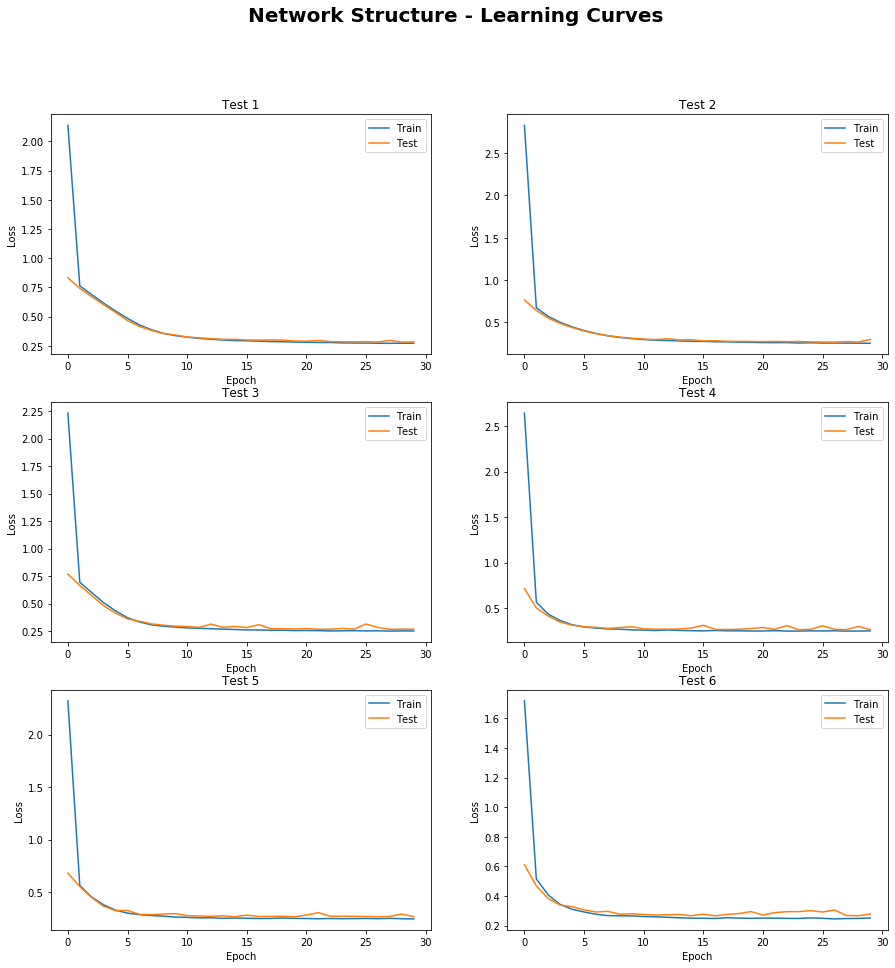

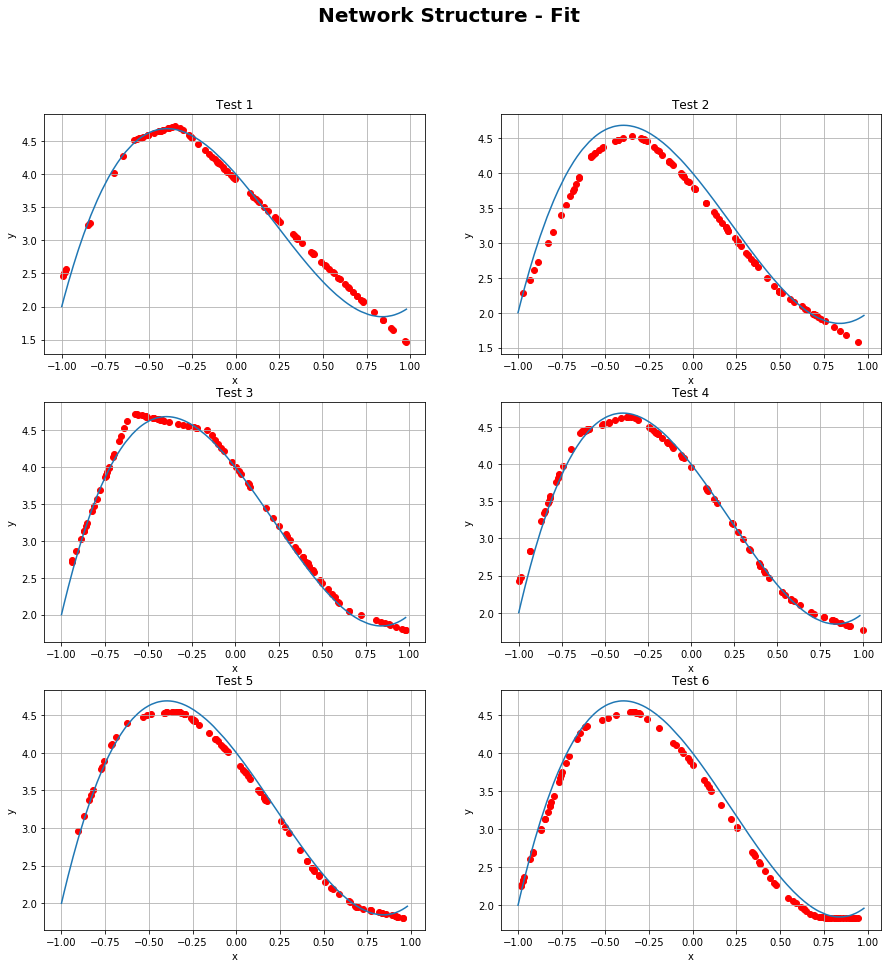

In [213]:
score5 = model5.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score6 = model6.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score7 = model7.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score8 = model8.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score9 = model9.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score10 = model10.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print("Test 1")
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])
print("Test 2")
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])
print("Test 3")
print('Test loss:', score7[0])
print('Test accuracy:', score7[1])
print("Test 4")
print('Test loss:', score8[0])
print('Test accuracy:', score8[1])
print("Test 5")
print('Test loss:', score9[0])
print('Test accuracy:', score10[1])
print("Test 6")
print('Test loss:', score10[0])
print('Test accuracy:', score10[1])


fig=plt.figure(figsize=(15,15))
fig.suptitle('Network Structure - Learning Curves', fontsize=20, fontweight="bold")


plt.subplot(321)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Test 1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(322)
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Test 2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(323)
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('Test 3')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(324)
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('Test 4')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')


plt.subplot(325)
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('Test 5')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(326)
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('Test 6')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

fig=plt.figure(figsize=(15,15))
fig.suptitle('Network Structure - Fit', fontsize=20, fontweight="bold")

plt.subplot(321)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model5.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 1')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(322)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model6.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 2')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(323)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model7.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 3')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(324)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model8.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 4')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(325)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model9.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 5')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(326)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model10.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 6')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.show()

## Functions 

Le reti che hanno ottenuto i risultati migliori sono state quelle utilizzate per i test 4 e 5, ovvero $[100, 50, 100, 50, 1]$, $[100, 100, 50, 50, 1]$ . Perciò nella seguente sezione si testeranno i risultati variando la loss function e le attivazioni in entrambi i modelli. Per ognuna delle due configurazioni strutturali, verrano testati i risultati con: 
- test 1: "elu" come attivazione; "elu" differentemente da "relu" presenta valori negativi per $x<0$, seguendo l'andamento di $f(x)=\alpha(\exp(x)-1)$ con $\alpha=1$
- test 2: "mae" come loss; non presentando la quadratura, tende a pesare in minor modo le incertezze dovute a valori lontani dalla curva del modello, perciò gestisce meglio la presenza di valori limite. 
- test 3: "logcosh" come loss; infine si è testato anche "logcosh" che ha un comportamento simile a "mse" ma è influenzato dai grandi errori in ancora minor misura rispetto a "mae".

In [214]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2000)
x_valid = np.random.uniform(-1, 1, 200)
x_valid.sort()
y_target = eval(a, b, c, d, x_valid) 

sigma = 0.5 #noise
y_train = np.random.normal(eval(a, b, c, d, x_train) , sigma) 
y_valid = np.random.normal(eval(a, b, c, d, x_valid) , sigma)

model11 = tf.keras.Sequential()
model12 = tf.keras.Sequential()
model13 = tf.keras.Sequential()
model14 = tf.keras.Sequential()
model15 = tf.keras.Sequential()
model16 = tf.keras.Sequential()


In [215]:
model11.add(Dense(100, input_shape=(1,), activation='relu'))
model11.add(Dense(50, activation = 'elu'))
model11.add(Dense(100, activation = 'elu'))
model11.add(Dense(50, activation = 'elu'))
model11.add(Dense(1,))

model11.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history11 = model11.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 1.1930 - mean_absolute_error: 0.8114 - val_loss: 0.5634 - val_mean_absolute_error: 0.5730
Epoch 2/30
2000/2000 [==============================] - 0s 196us/sample - loss: 0.4864 - mean_absolute_error: 0.5395 - val_loss: 0.4392 - val_mean_absolute_error: 0.5260
Epoch 3/30
2000/2000 [==============================] - 0s 188us/sample - loss: 0.3949 - mean_absolute_error: 0.4953 - val_loss: 0.3801 - val_mean_absolute_error: 0.4942
Epoch 4/30
2000/2000 [==============================] - 0s 187us/sample - loss: 0.3379 - mean_absolute_error: 0.4598 - val_loss: 0.3263 - val_mean_absolute_error: 0.4643
Epoch 5/30
2000/2000 [==============================] - 0s 193us/sample - loss: 0.3097 - mean_absolute_error: 0.4409 - val_loss: 0.3258 - val_mean_absolute_error: 0.4585
Epoch 6/30
2000/2000 [==============================] - 0s 187us/sample - loss: 0.3007 - mean_absolute_er

In [216]:
model12.add(Dense(100, input_shape=(1,), activation='elu'))
model12.add(Dense(100, activation = 'elu'))
model12.add(Dense(50, activation = 'elu'))
model12.add(Dense(50, activation = 'elu'))
model12.add(Dense(1,))

model12.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history12 = model12.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 1.2978 - mean_absolute_error: 0.8239 - val_loss: 0.7208 - val_mean_absolute_error: 0.6608
Epoch 2/30
2000/2000 [==============================] - 0s 197us/sample - loss: 0.6801 - mean_absolute_error: 0.6367 - val_loss: 0.6831 - val_mean_absolute_error: 0.6562
Epoch 3/30
2000/2000 [==============================] - 0s 190us/sample - loss: 0.6214 - mean_absolute_error: 0.6114 - val_loss: 0.6062 - val_mean_absolute_error: 0.6058
Epoch 4/30
2000/2000 [==============================] - 0s 188us/sample - loss: 0.5533 - mean_absolute_error: 0.5791 - val_loss: 0.5370 - val_mean_absolute_error: 0.5779
Epoch 5/30
2000/2000 [==============================] - 0s 191us/sample - loss: 0.4888 - mean_absolute_error: 0.5497 - val_loss: 0.5142 - val_mean_absolute_error: 0.5678
Epoch 6/30
2000/2000 [==============================] - 0s 187us/sample - loss: 0.4387 - mean_absolute_er

In [217]:
model13.add(Dense(100, input_shape=(1,), activation='relu'))
model13.add(Dense(50, activation='relu'))
model13.add(Dense(100, activation = 'relu'))
model13.add(Dense(50, activation = 'relu'))
model13.add(Dense(1,))

model13.compile(optimizer='sgd', loss='mae', metrics=['mse'])
history13 = model13.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/sample - loss: 2.3910 - mean_squared_error: 7.3952 - val_loss: 1.3164 - val_mean_squared_error: 2.5559
Epoch 2/30
2000/2000 [==============================] - 0s 176us/sample - loss: 0.9514 - mean_squared_error: 1.2840 - val_loss: 0.7295 - val_mean_squared_error: 0.8192
Epoch 3/30
2000/2000 [==============================] - 0s 174us/sample - loss: 0.6517 - mean_squared_error: 0.7121 - val_loss: 0.6094 - val_mean_squared_error: 0.6627
Epoch 4/30
2000/2000 [==============================] - 0s 170us/sample - loss: 0.5771 - mean_squared_error: 0.6051 - val_loss: 0.5830 - val_mean_squared_error: 0.5844
Epoch 5/30
2000/2000 [==============================] - 0s 173us/sample - loss: 0.5469 - mean_squared_error: 0.5416 - val_loss: 0.5623 - val_mean_squared_error: 0.5269
Epoch 6/30
2000/2000 [==============================] - 0s 173us/sample - loss: 0.5197 - mean_squared_error: 0.4794

In [218]:
model14.add(Dense(100, input_shape=(1,), activation='relu'))
model14.add(Dense(100, activation='relu'))
model14.add(Dense(50, activation = 'relu'))
model14.add(Dense(50, activation = 'relu'))
model14.add(Dense(1,))


model14.compile(optimizer='sgd', loss='mae', metrics=['mse'])
model14.summary()
history14 = model14.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_539 (Dense)            (None, 100)               200       
_________________________________________________________________
dense_540 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_541 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_542 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_543 (Dense)            (None, 1)                 51        
Total params: 17,951
Trainable params: 17,951
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/samp

In [219]:
model15.add(Dense(100, input_shape=(1,), activation='relu'))
model15.add(Dense(50, activation='relu'))
model15.add(Dense(100, activation = 'relu'))
model15.add(Dense(50, activation = 'relu'))
model15.add(Dense(1,))


model15.compile(optimizer='sgd', loss='logcosh', metrics=['mse'])
model15.summary()
history15 = model15.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
         shuffle=True, 
          validation_data=(x_valid, y_valid))

Model: "sequential_131"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_544 (Dense)            (None, 100)               200       
_________________________________________________________________
dense_545 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_546 (Dense)            (None, 100)               5100      
_________________________________________________________________
dense_547 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_548 (Dense)            (None, 1)                 51        
Total params: 15,451
Trainable params: 15,451
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/samp

In [220]:
model16.add(Dense(100, input_shape=(1,), activation='relu'))
model16.add(Dense(100, activation='relu'))
model16.add(Dense(50, activation = 'relu'))
model16.add(Dense(50, activation = 'relu'))
model16.add(Dense(1,))


model16.compile(optimizer='sgd', loss='logcosh', metrics=['mse'])
model16.summary()
history16 = model16.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30, shuffle=True, 
          validation_data=(x_valid, y_valid))

Model: "sequential_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_549 (Dense)            (None, 100)               200       
_________________________________________________________________
dense_550 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_551 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_552 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_553 (Dense)            (None, 1)                 51        
Total params: 17,951
Trainable params: 17,951
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/samp

200/200 [==============================] - 0s 157us/sample - loss: 0.1206 - mean_squared_error: 0.2690
Test 1
Test loss: 0.270203183889389
Test accuracy: 0.41886505
Test 2
Test loss: 0.34113223910331725
Test accuracy: 0.46453124
Test 3
Test loss: 0.41931962966918945
Test accuracy: 0.26657796
Test 4
Test loss: 0.41851211309432984
Test accuracy: 0.2651095
Test 5
Test loss: 0.12231547862291337
Test accuracy: 0.27304387
Test 6
Test loss: 0.12062254637479781
Test accuracy: 0.26899442


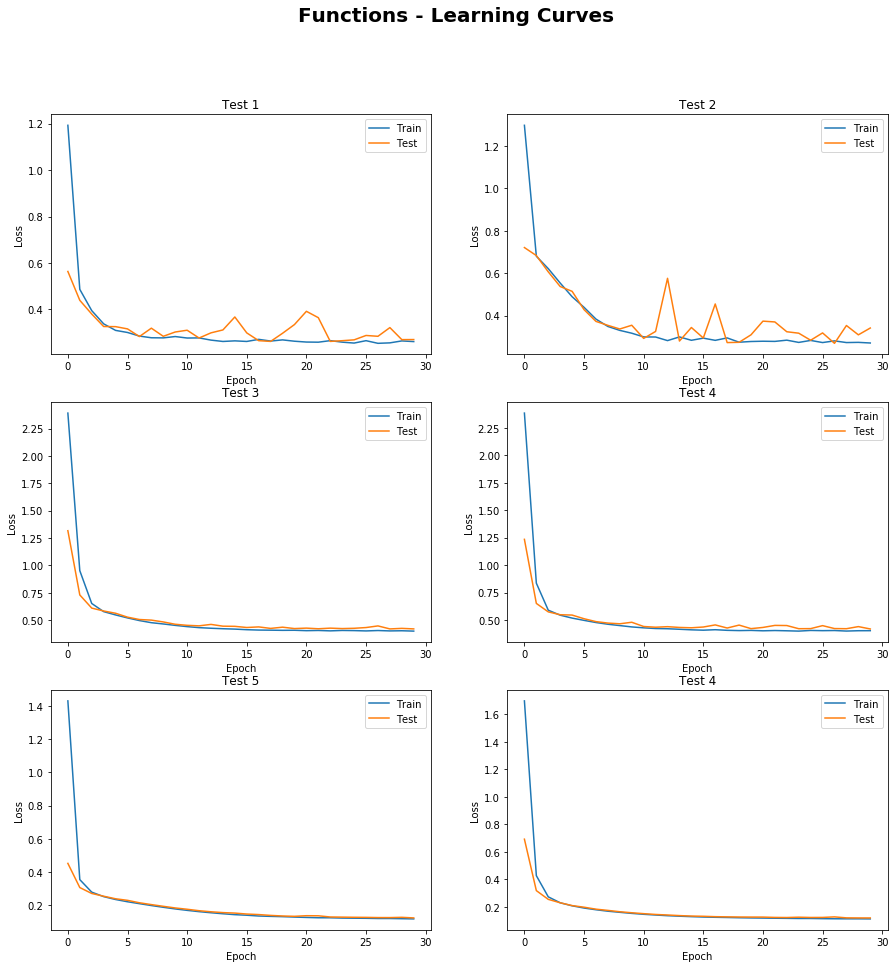

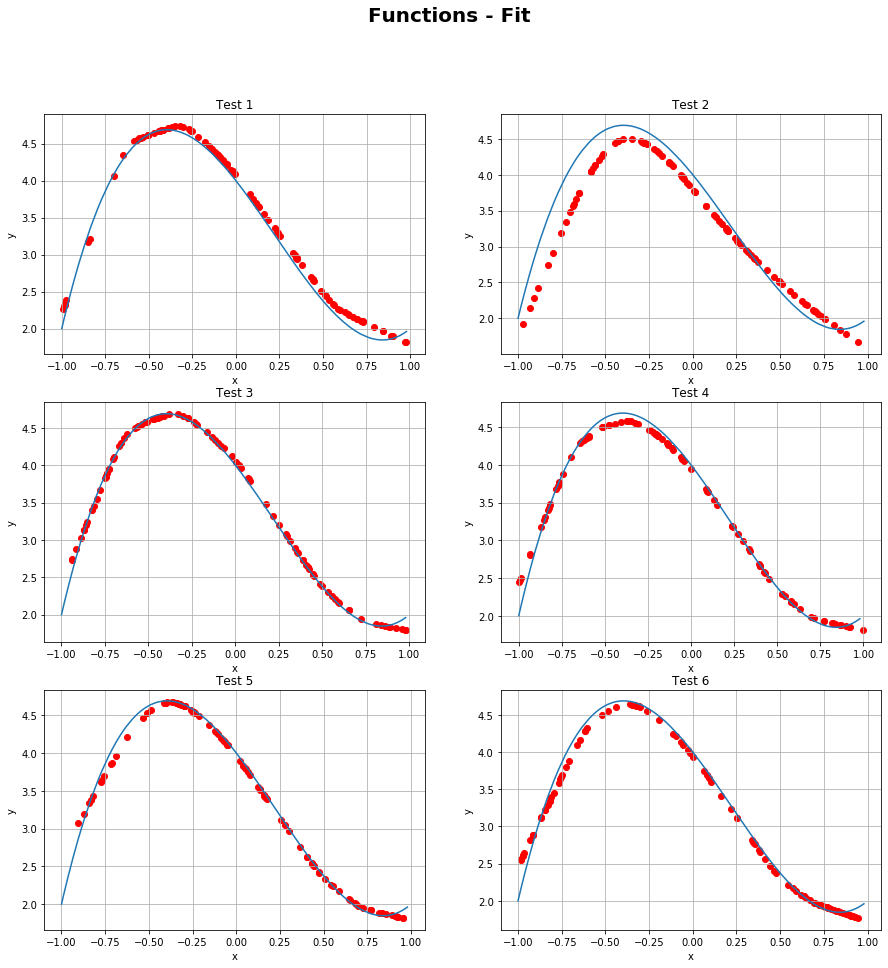

In [221]:
# evaluate model
score11 = model11.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score12 = model12.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score13 = model13.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score14 = model14.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score15 = model15.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score16 = model16.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print("Test 1")
print('Test loss:', score11[0])
print('Test accuracy:', score11[1])
print("Test 2")
print('Test loss:', score12[0])
print('Test accuracy:', score12[1])
print("Test 3")
print('Test loss:', score13[0])
print('Test accuracy:', score13[1])
print("Test 4")
print('Test loss:', score14[0])
print('Test accuracy:', score14[1])
print("Test 5")
print('Test loss:', score15[0])
print('Test accuracy:', score15[1])
print("Test 6")
print('Test loss:', score16[0])
print('Test accuracy:', score16[1])

fig=plt.figure(figsize=(15,15))
fig.suptitle('Functions - Learning Curves', fontsize=20, fontweight="bold")


plt.subplot(321)
plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])
plt.title('Test 1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(322)
plt.plot(history12.history['loss'])
plt.plot(history12.history['val_loss'])
plt.title('Test 2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(323)
plt.plot(history13.history['loss'])
plt.plot(history13.history['val_loss'])
plt.title('Test 3')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(324)
plt.plot(history14.history['loss'])
plt.plot(history14.history['val_loss'])
plt.title('Test 4')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(325)
plt.plot(history15.history['loss'])
plt.plot(history15.history['val_loss'])
plt.title('Test 5')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(326)
plt.plot(history16.history['loss'])
plt.plot(history16.history['val_loss'])
plt.title('Test 4')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

fig=plt.figure(figsize=(15,15))
fig.suptitle('Functions - Fit', fontsize=20, fontweight="bold")

plt.subplot(321)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model11.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 1')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(322)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model12.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 2')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(323)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model13.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 3')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(324)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model14.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 4')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(325)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model15.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 5')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(326)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model16.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 6')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.show()

## Ottimizzatore ed intervallo: 

Infine si è utilizzato il miglior modello ottenuto fin'ora per testare il funzionamento dell'ottimizatore Adagrad, il quale permette di settare il learning rate e il decay rate, confrontato con SDG. 

- test 1: Ottimizzatore SDG 
- test 2: Ottimizzatore Adagrad - Learning rate: 0.5
- test 3: Ottimizzatore Adagrad - Learning rate: 0.9 Decay=0.1 
- test 4: Ottimizzatore Adagrad - Learning rate: 1.0 Decay=0.5

Infine è stato mostrato il comportamento predittivo del modello al di fuori dell'intervallo di apprendimento. 



In [232]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2000)
x_valid = np.random.uniform(-1, 1, 200)
x_valid.sort()
y_target = eval(a, b, c, d, x_valid) 

sigma = 0.5 #noise
y_train = np.random.normal(eval(a, b, c, d, x_train) , sigma) 
y_valid = np.random.normal(eval(a, b, c, d, x_valid) , sigma)

model17 = tf.keras.Sequential()
model18 = tf.keras.Sequential()
model19 = tf.keras.Sequential()
model20 = tf.keras.Sequential()

In [233]:
model17.add(Dense(100, input_shape=(1,), activation='relu'))
model17.add(Dense(50, activation = 'relu'))
model17.add(Dense(100, activation = 'relu'))
model17.add(Dense(50, activation = 'relu'))
model17.add(Dense(1,))

model17.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history17 = model17.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 2.0394 - mean_absolute_error: 1.0666 - val_loss: 0.6406 - val_mean_absolute_error: 0.6269
Epoch 2/30
2000/2000 [==============================] - 0s 207us/sample - loss: 0.5413 - mean_absolute_error: 0.5715 - val_loss: 0.4841 - val_mean_absolute_error: 0.5401
Epoch 3/30
2000/2000 [==============================] - 0s 186us/sample - loss: 0.4188 - mean_absolute_error: 0.5032 - val_loss: 0.4020 - val_mean_absolute_error: 0.5002
Epoch 4/30
2000/2000 [==============================] - 0s 182us/sample - loss: 0.3458 - mean_absolute_error: 0.4607 - val_loss: 0.3389 - val_mean_absolute_error: 0.4686
Epoch 5/30
2000/2000 [==============================] - 0s 185us/sample - loss: 0.3096 - mean_absolute_error: 0.4388 - val_loss: 0.3254 - val_mean_absolute_error: 0.4577
Epoch 6/30
2000/2000 [==============================] - 0s 186us/sample - loss: 0.2933 - mean_absolute_er

In [234]:
model18.add(Dense(100, input_shape=(1,), activation='relu'))
model18.add(Dense(50, activation = 'relu'))
model18.add(Dense(100, activation = 'relu'))
model18.add(Dense(50, activation = 'relu'))
model18.add(Dense(1,))

keras.optimizers.Adagrad(lr=0.5, epsilon=None, decay=0.0)
model18.compile(optimizer='Adagrad', loss='mse', metrics=['mae'])
history18 = model18.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 8.7858 - mean_absolute_error: 2.6872 - val_loss: 6.1013 - val_mean_absolute_error: 2.1449
Epoch 2/30
2000/2000 [==============================] - 0s 200us/sample - loss: 3.9069 - mean_absolute_error: 1.6435 - val_loss: 2.8533 - val_mean_absolute_error: 1.4458
Epoch 3/30
2000/2000 [==============================] - 0s 209us/sample - loss: 2.2877 - mean_absolute_error: 1.2881 - val_loss: 2.1685 - val_mean_absolute_error: 1.2515
Epoch 4/30
2000/2000 [==============================] - 0s 209us/sample - loss: 1.9013 - mean_absolute_error: 1.1656 - val_loss: 1.8650 - val_mean_absolute_error: 1.1465
Epoch 5/30
2000/2000 [==============================] - 0s 207us/sample - loss: 1.6598 - mean_absolute_error: 1.0756 - val_loss: 1.6309 - val_mean_absolute_error: 1.0598
Epoch 6/30
2000/2000 [==============================] - 0s 209us/sample - loss: 1.4611 - mean_absolute_er

In [235]:
model19.add(Dense(100, input_shape=(1,), activation='relu'))
model19.add(Dense(50, activation = 'relu'))
model19.add(Dense(100, activation = 'relu'))
model19.add(Dense(50, activation = 'relu'))
model19.add(Dense(1,))

keras.optimizers.Adagrad(lr=0.9, epsilon=None, decay=0.1)
model19.compile(optimizer='Adagrad', loss='mse', metrics=['mae'])
history19 = model19.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 10.5734 - mean_absolute_error: 3.0416 - val_loss: 9.0332 - val_mean_absolute_error: 2.7780
Epoch 2/30
2000/2000 [==============================] - 0s 203us/sample - loss: 6.6690 - mean_absolute_error: 2.2777 - val_loss: 4.9974 - val_mean_absolute_error: 1.9259
Epoch 3/30
2000/2000 [==============================] - 0s 196us/sample - loss: 3.4997 - mean_absolute_error: 1.5581 - val_loss: 2.9067 - val_mean_absolute_error: 1.4595
Epoch 4/30
2000/2000 [==============================] - 0s 203us/sample - loss: 2.3791 - mean_absolute_error: 1.3022 - val_loss: 2.3217 - val_mean_absolute_error: 1.2967
Epoch 5/30
2000/2000 [==============================] - 0s 199us/sample - loss: 2.0547 - mean_absolute_error: 1.2102 - val_loss: 2.0659 - val_mean_absolute_error: 1.2140
Epoch 6/30
2000/2000 [==============================] - 0s 198us/sample - loss: 1.8604 - mean_absolute_e

In [236]:
model20.add(Dense(100, input_shape=(1,), activation='relu'))
model20.add(Dense(50, activation = 'relu'))
model20.add(Dense(100, activation = 'relu'))
model20.add(Dense(50, activation = 'relu'))
model20.add(Dense(1,))

keras.optimizers.Adagrad(lr=1.0, epsilon=None, decay=0.5)
model20.compile(optimizer='Adagrad', loss='mse', metrics=['mae'])
history20 = model20.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, 
          validation_data=(x_valid, y_valid))

Train on 2000 samples, validate on 200 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/sample - loss: 9.2757 - mean_absolute_error: 2.7695 - val_loss: 6.6007 - val_mean_absolute_error: 2.2445
Epoch 2/30
2000/2000 [==============================] - 0s 201us/sample - loss: 4.1451 - mean_absolute_error: 1.7036 - val_loss: 2.8846 - val_mean_absolute_error: 1.4512
Epoch 3/30
2000/2000 [==============================] - 0s 227us/sample - loss: 2.2635 - mean_absolute_error: 1.2802 - val_loss: 2.1074 - val_mean_absolute_error: 1.2287
Epoch 4/30
2000/2000 [==============================] - 0s 197us/sample - loss: 1.8439 - mean_absolute_error: 1.1416 - val_loss: 1.8129 - val_mean_absolute_error: 1.1242
Epoch 5/30
2000/2000 [==============================] - 0s 195us/sample - loss: 1.6031 - mean_absolute_error: 1.0471 - val_loss: 1.5789 - val_mean_absolute_error: 1.0338
Epoch 6/30
2000/2000 [==============================] - 0s 219us/sample - loss: 1.4065 - mean_absolute_er

200/200 [==============================] - 0s 162us/sample - loss: 0.3753 - mean_absolute_error: 0.4885
Test 1
Test loss: 0.2768414896726608
Test accuracy: 0.42463315
Test 2
Test loss: 0.32947970390319825
Test accuracy: 0.46200952
Test 3
Test loss: 0.4031782412528992
Test accuracy: 0.5012382
Test 4
Test loss: 0.3752502977848053
Test accuracy: 0.48851493


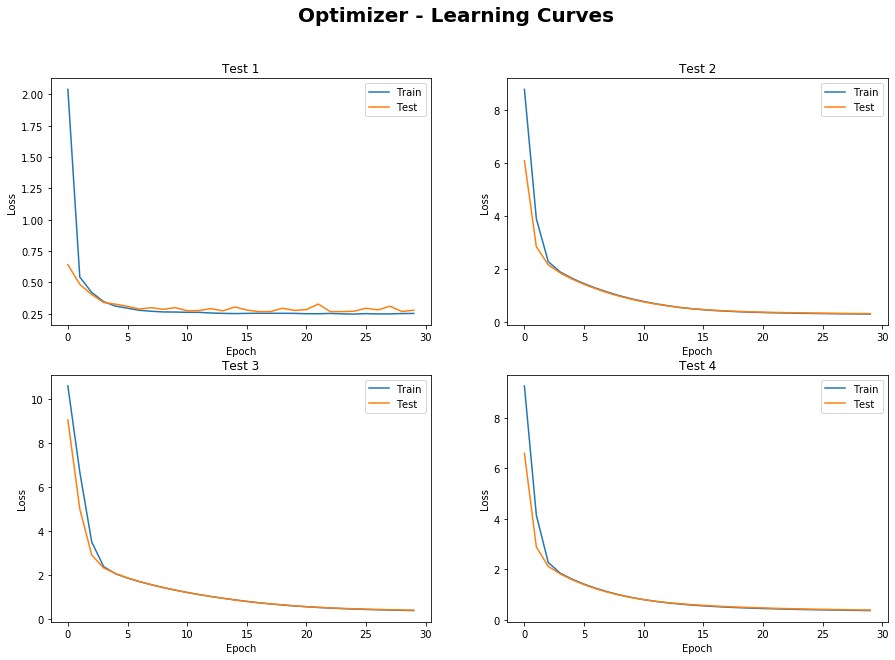

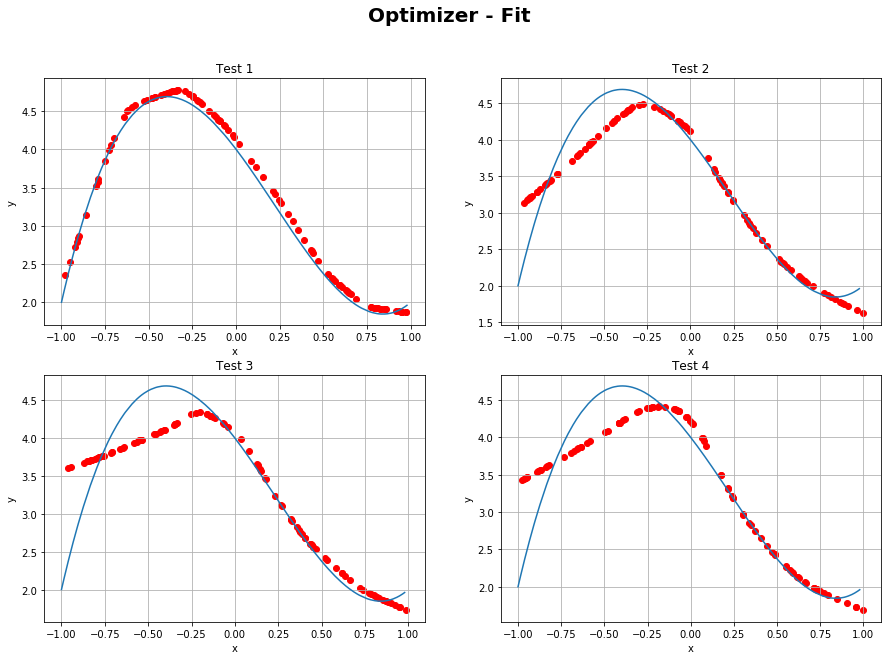

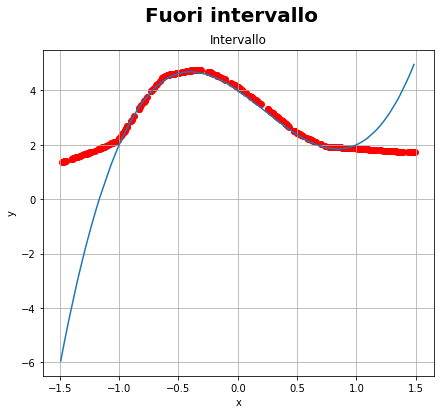

In [237]:
# evaluate model
score17 = model17.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score18 = model18.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score19 = model19.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score20 = model20.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print("Test 1")
print('Test loss:', score17[0])
print('Test accuracy:', score17[1])
print("Test 2")
print('Test loss:', score18[0])
print('Test accuracy:', score18[1])
print("Test 3")
print('Test loss:', score19[0])
print('Test accuracy:', score19[1])
print("Test 4")
print('Test loss:', score20[0])
print('Test accuracy:', score20[1])


fig=plt.figure(figsize=(15,10))
fig.suptitle('Optimizer - Learning Curves', fontsize=20, fontweight="bold")


plt.subplot(221)
plt.plot(history17.history['loss'])
plt.plot(history17.history['val_loss'])
plt.title('Test 1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(222)
plt.plot(history18.history['loss'])
plt.plot(history18.history['val_loss'])
plt.title('Test 2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(223)
plt.plot(history19.history['loss'])
plt.plot(history19.history['val_loss'])
plt.title('Test 3')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(224)
plt.plot(history20.history['loss'])
plt.plot(history20.history['val_loss'])
plt.title('Test 4')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.show()

fig=plt.figure(figsize=(15,10))
fig.suptitle('Optimizer - Fit', fontsize=20, fontweight="bold")

plt.subplot(221)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model17.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 1')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(222)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model18.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 2')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(223)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model19.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 3')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.subplot(224)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model20.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.title('Test 4')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

plt.show()

fig=plt.figure(figsize=(7,6))
fig.suptitle('Fuori intervallo', fontsize=20, fontweight="bold")

x_valid = np.random.uniform(-1.5, 1.5, 200)
x_valid.sort()
y_int = eval(a, b, c, d, x_valid) 
x_predicted = np.random.uniform(-1.5, 1.5, 300)
y_predicted = model17.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_int)
plt.title('Intervallo')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)

## Commento conclusivo 

Dopo diversi tentativi con reti neurali con strutture e caratteristiche diverse, si possono evincere alcune considerazioni generali per il fit di funzioni polinomiali:

- E' presente un numero minimo di neuroni per ogni layer e un minimo di layer sotto il quale la rete non è in grado di apprendere il modello. Nel caso del polinomio in esame la struttura [5, 3, 1] è già sufficiente a dare una buona approssimazione. 
- Il layer conclusivo deve avere la stessa dimensione dell'output e si ottengono risultati migliori se per l'ultimo layer viene utilizzato l'attivatore lineare. 
- L'approssimazione della curva ha valore solamente nell'intervallo nel quale è stato addestrato l'algoritmo.
- Una struttura che favorisce l'ampiezza piuttosto che la profondità sembra dare migliori risultati per quanto riguarda l'ottimizzatore SDG accoppiato con la funzione Loss MSE e l'attivatore Relu; combinazione con la quale sono stati osservati i risultati migliori.
- il risultato migliore è stato ottenuto con [100, 50, 100, 50, 1] e perciò con una successione delle ampiezze non piramidale.
- L'incertezza ottenuta con la funzione loss "mse" risulta essere di poco maggiore a 0,25; il risultato è atteso dato il rumore gaussiano dei valori settato a 0.5; 
- Dalle varie prove è emerso che un ampliamento della rete neurale in ampiezza o profondità non necessariamente porta ad un migliore apprendimento fino a casi in cui la rete neurale maggiorata non è in grado di apprendere del tutto. 


# Sinusoide 

Infine l'ultima funzione in esame è $f(x,y) = \sin(x^2+y^2)$ per $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.
La migliore struttura usata in precedenza si è rivelata particolarmente versatile in quanto il risultato del fit della funzione sinusoidale con la medesima rete neurale è risultato soddisfacente. 

Per il fit sono stati utilizzati $5000$ valori di $train$ e $500$ di $validation$ per entrambe le coordinate di input, ed è stato utilizzato un numero di epoche pari a 70 con una dimensione del batch pari a 32. In seguito sono mostrati i grafici relativi alla curva di apprendimento e al confronto con il risultato analitico in 2 e 3 dimensioni.  


In [239]:
np.random.seed(0)
import math
x_train = np.random.uniform(-1.5, 1.5, 5000)
x_valid = np.random.uniform(-1.5, 1.5, 500)
y_train = np.random.uniform(-1.5, 1.5, 5000)
y_valid = np.random.uniform(-1.5, 1.5, 500)

x_valid.sort()
y_valid.sort()

sigma = 0.5 #noise
z_train = np.random.normal(np.sin(x_train*x_train+y_train*y_train) 
 , sigma) 
z_valid = np.random.normal(np.sin(x_valid*x_valid+y_valid*y_valid) 
 , sigma)


model21 = tf.keras.Sequential()

model21.add(Dense(100, input_shape=(2,), activation="relu"))
model21.add(Dense(50, activation="relu"))
model21.add(Dense(100, activation="relu"))
model21.add(Dense(50, activation="relu"))
model21.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model21.compile(optimizer='sgd', loss='mse', metrics=['mae'])
model21.summary()

# compile the model choosing optimizer, loss and metrics objects
train=np.column_stack((x_train, y_train))
valid=np.column_stack((x_valid, y_valid))

history21 = model21.fit(x=train, y=z_train, 
          batch_size=32, epochs=75,
          shuffle=True, 
          validation_data=(valid, z_valid))


Model: "sequential_143"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_604 (Dense)            (None, 100)               300       
_________________________________________________________________
dense_605 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_606 (Dense)            (None, 100)               5100      
_________________________________________________________________
dense_607 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_608 (Dense)            (None, 1)                 51        
Total params: 15,551
Trainable params: 15,551
Non-trainable params: 0
_________________________________________________________________
Train on 5000 samples, validate on 500 samples
Epoch 1/75
5000/5000 [==============================] - 6s 1ms/samp

Epoch 43/75
5000/5000 [==============================] - 1s 190us/sample - loss: 0.2532 - mean_absolute_error: 0.4011 - val_loss: 0.2896 - val_mean_absolute_error: 0.4165
Epoch 44/75
5000/5000 [==============================] - 1s 195us/sample - loss: 0.2532 - mean_absolute_error: 0.4002 - val_loss: 0.2696 - val_mean_absolute_error: 0.4032
Epoch 45/75
5000/5000 [==============================] - 1s 190us/sample - loss: 0.2530 - mean_absolute_error: 0.4011 - val_loss: 0.2770 - val_mean_absolute_error: 0.4103
Epoch 46/75
5000/5000 [==============================] - 1s 191us/sample - loss: 0.2530 - mean_absolute_error: 0.4011 - val_loss: 0.2684 - val_mean_absolute_error: 0.4005
Epoch 47/75
5000/5000 [==============================] - 1s 180us/sample - loss: 0.2521 - mean_absolute_error: 0.3994 - val_loss: 0.3085 - val_mean_absolute_error: 0.4363
Epoch 48/75
5000/5000 [==============================] - 1s 186us/sample - loss: 0.2524 - mean_absolute_error: 0.3998 - val_loss: 0.2767 - val_me

500/500 [==============================] - 0s 46us/sample - loss: 0.2772 - mean_absolute_error: 0.4028
Test loss: 0.2772239327430725
Test accuracy: 0.40282983


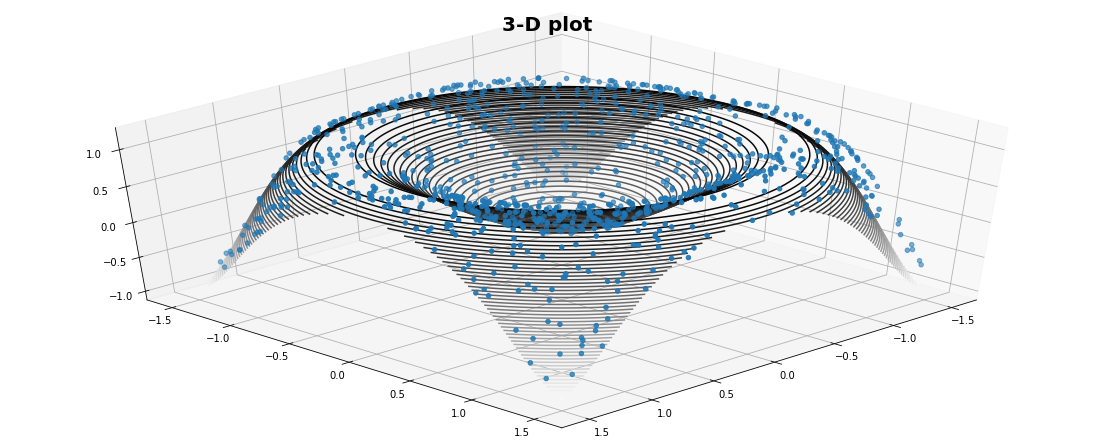

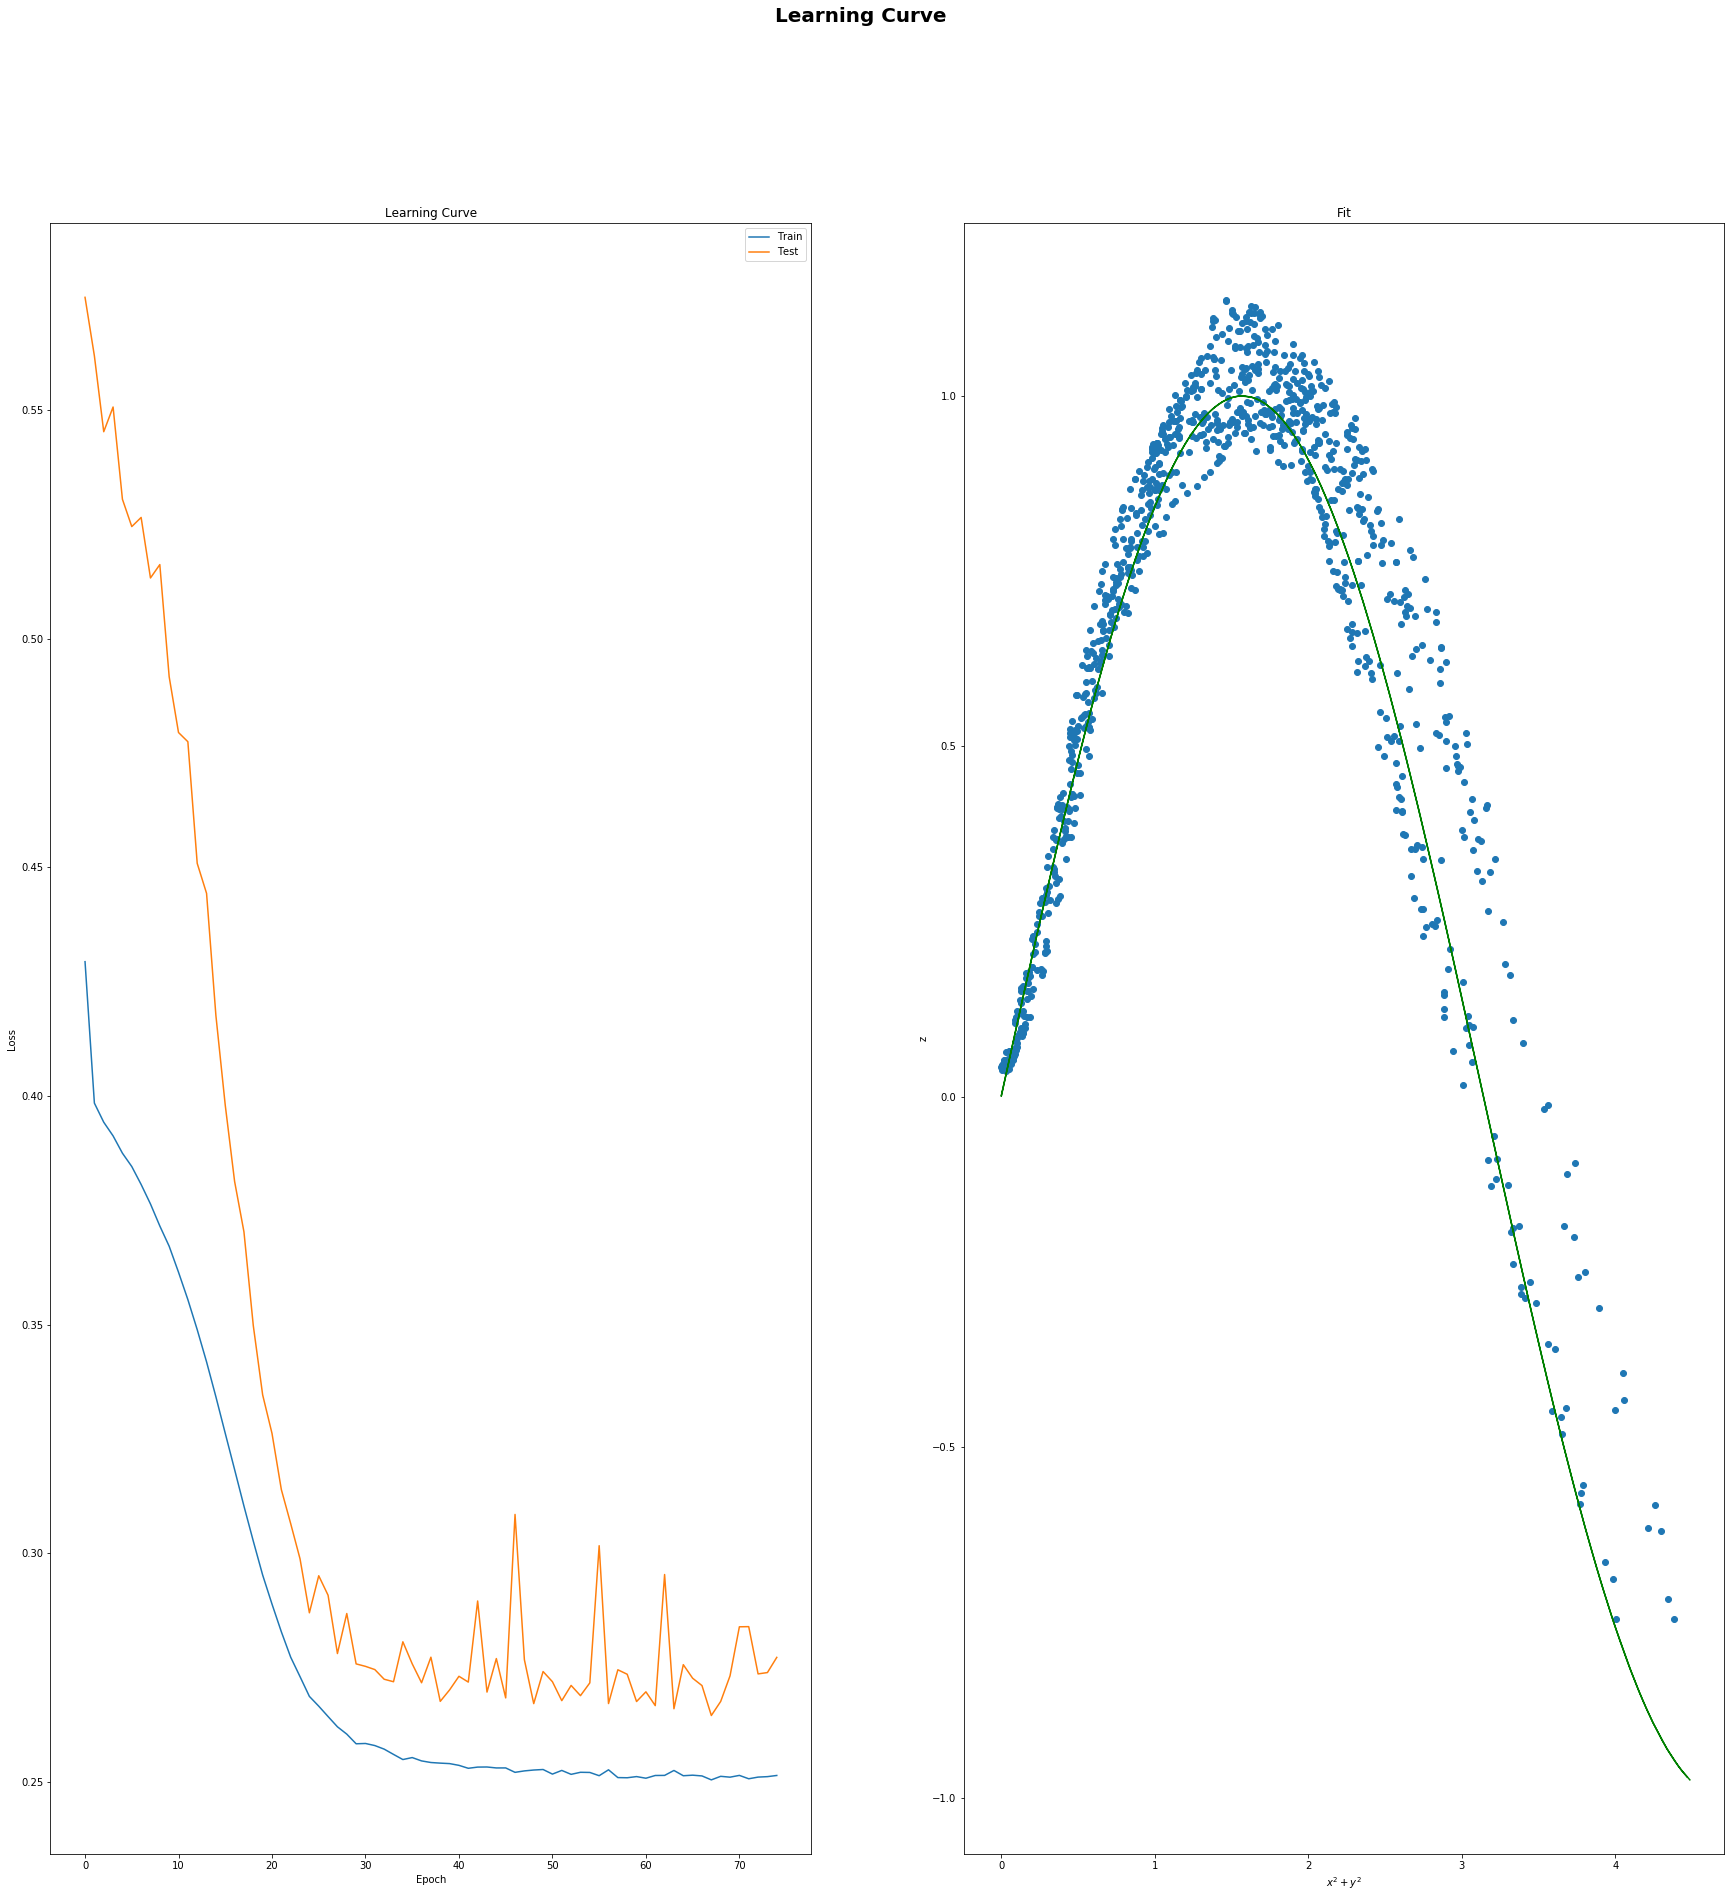

In [241]:
#print (model.get_weights())

# evaluate model
score21 = model21.evaluate(valid, z_valid, batch_size=100, verbose=1)
print('Test loss:', score21[0])
print('Test accuracy:', score21[1])

from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(15,6))
fig.suptitle('3-D plot', fontsize=20, fontweight="bold")

x_predicted = np.random.uniform(-1.5, 1.5, 1000)
y_predicted = np.random.uniform(-1.5, 1.5, 1000)
predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model21.predict(predicted)
ax = Axes3D(fig)
X, Y = np.meshgrid(x_valid, y_valid)
z_target = np.sin(X*X+Y*Y)
ax.scatter(x_predicted, y_predicted, z_predicted)
ax.contour3D(X, Y, z_target, 50, cmap='binary')
ax.view_init(45, 45)
plt.grid(True)




fig=plt.figure(figsize=(30,30))

fig.suptitle('Results', fontsize=20, fontweight="bold")

plt.subplot(121)
fig.suptitle('Learning Curve', fontsize=20, fontweight="bold")
plt.plot(history21.history['loss'])
plt.plot(history21.history['val_loss'])
plt.title('Learning Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

plt.subplot(122)
z_target = np.sin(x_valid*x_valid+y_valid*y_valid) 
plt.plot(x_valid*x_valid+y_valid*y_valid, z_target, color='green')
plt.scatter(x_predicted*x_predicted+y_predicted*y_predicted, z_predicted)
plt.title('Fit')
plt.ylabel('z')
plt.xlabel('$x^2+y^2$')


plt.show()
